In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("train.csv")

In [72]:
import numpy as np
import re

In [2]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
import nltk

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [76]:
df['location'].fillna(df['location'].mode()[0], inplace=True)
df

,id,keyword,location,text,target,has_location
0,1,NaN,nan,Our Deeds are the Reason of this #earthquake M...,1,True
1,4,NaN,nan,Forest fire near La Ronge Sask. Canada,1,True
2,5,NaN,nan,All residents asked to 'shelter in place' are ...,1,True
3,6,NaN,nan,"13,000 people receive #wildfires evacuation or...",1,True
4,7,NaN,nan,Just got sent this photo from Ruby #Alaska as ...,1,True
...,...,...,...,...,...,...
7608,10869,NaN,nan,Two giant cranes holding a bridge collapse int...,1,True
7609,10870,NaN,nan,@aria_ahrary @TheTawniest The out of control w...,1,True
7610,10871,NaN,nan,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True
7611,10872,NaN,nan,Police investigating after an e-bike collided ...,1,True


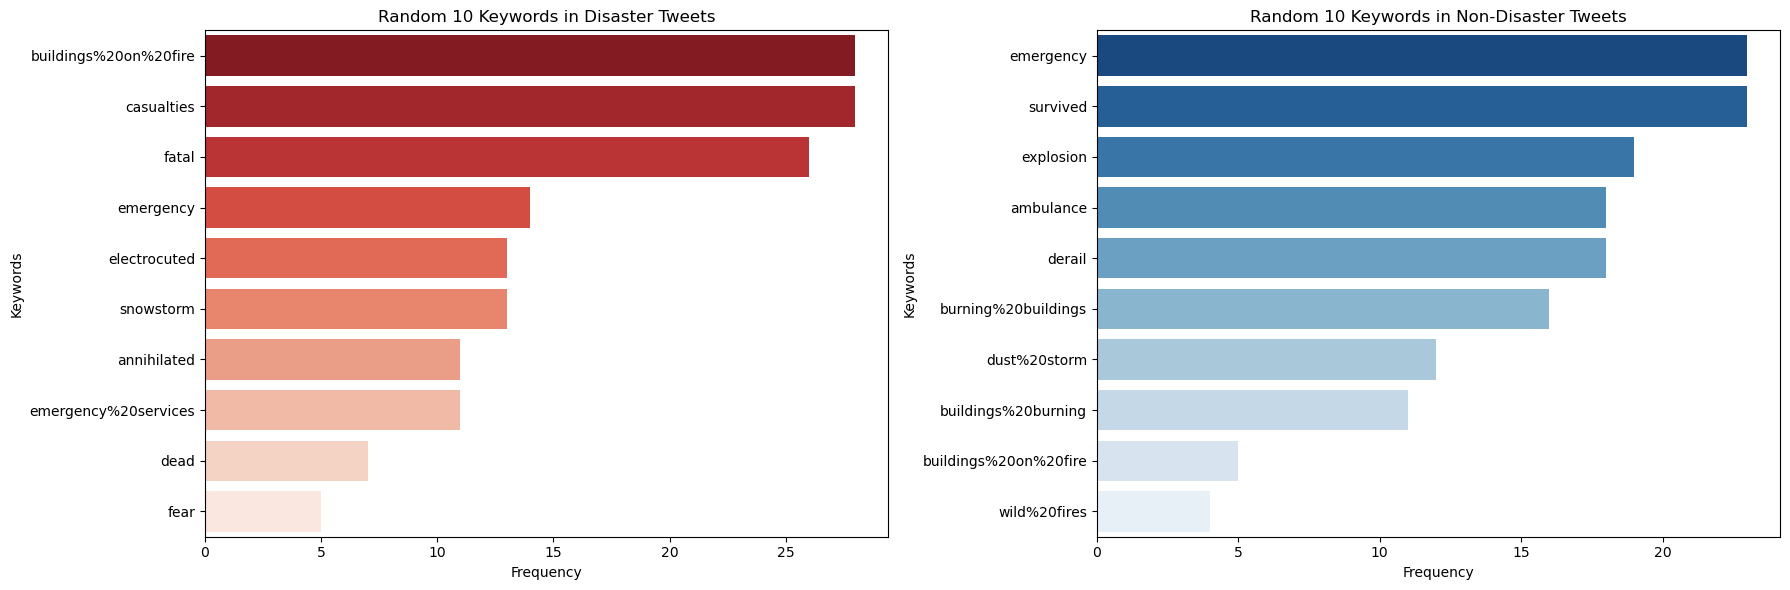

In [50]:
# Assuming 'keyword' and 'target' columns exist in your DataFrame
# Filter keywords for disaster and non-disaster tweets
keywords_disaster = df[df['target'] == 1]['keyword'].dropna().unique()
keywords_non_disaster = df[df['target'] == 0]['keyword'].dropna().unique()

# Randomly select 10 keywords from the disaster and non-disaster keywords
random_keywords_disaster = pd.Series(keywords_disaster).sample(10, random_state=1)
random_keywords_non_disaster = pd.Series(keywords_non_disaster).sample(10, random_state=1)

# Get frequency counts of the randomly selected keywords
keyword_disaster_counts = df[df['keyword'].isin(random_keywords_disaster) & (df['target'] == 1)]['keyword'].value_counts()
keyword_non_disaster_counts = df[df['keyword'].isin(random_keywords_non_disaster) & (df['target'] == 0)]['keyword'].value_counts()

# Plotting the random keywords
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Random Disaster Keywords
sns.barplot(x=keyword_disaster_counts.values, y=keyword_disaster_counts.index, ax=ax[0], palette="Reds_r")
ax[0].set_title('Random 10 Keywords in Disaster Tweets')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Keywords')

# Random Non-Disaster Keywords
sns.barplot(x=keyword_non_disaster_counts.values, y=keyword_non_disaster_counts.index, ax=ax[1], palette="Blues_r")
ax[1].set_title('Random 10 Keywords in Non-Disaster Tweets')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Keywords')

plt.tight_layout()
plt.show()

In [8]:
df = df.drop(['id'],axis=1)
df

,location,text,target
0,USA,Our Deeds are the Reason of this #earthquake M...,1
1,USA,Forest fire near La Ronge Sask. Canada,1
2,USA,All residents asked to 'shelter in place' are ...,1
3,USA,"13,000 people receive #wildfires evacuation or...",1
4,USA,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,USA,Two giant cranes holding a bridge collapse int...,1
7609,USA,@aria_ahrary @TheTawniest The out of control w...,1
7610,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,USA,Police investigating after an e-bike collided ...,1


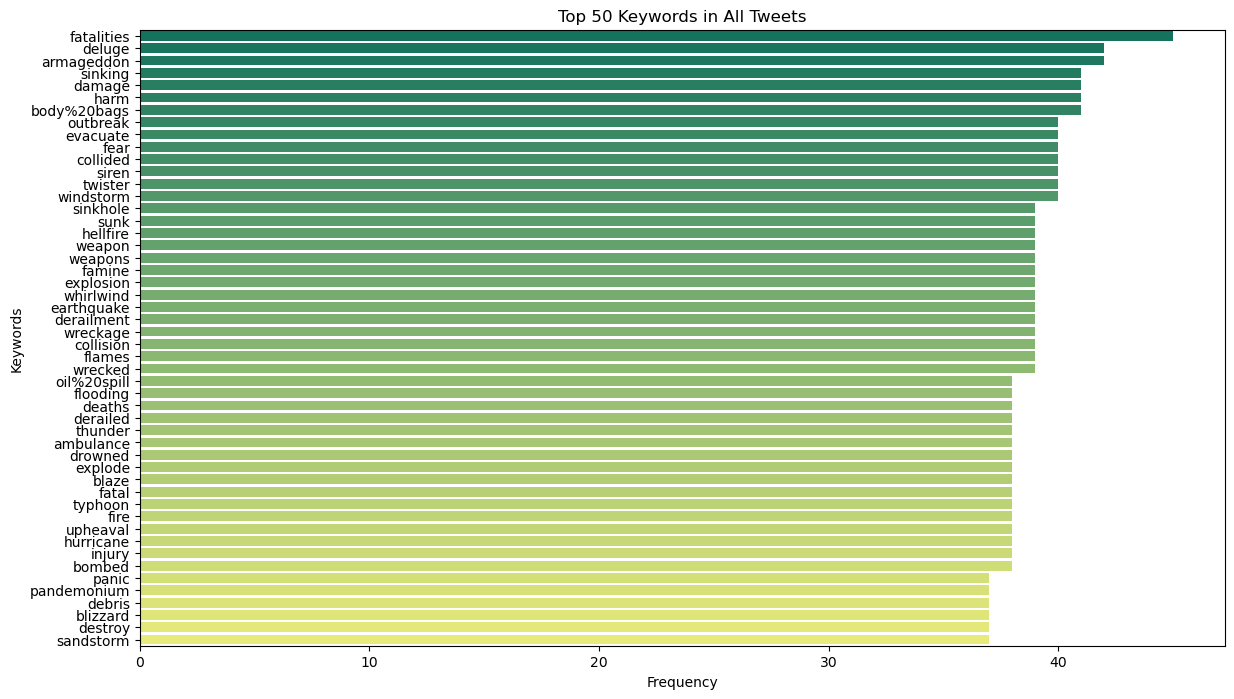

In [89]:
overall_keyword_frequency = df['keyword'].value_counts().head(50)

# Plot settings
plt.figure(figsize=(14, 8))
sns.barplot(x=overall_keyword_frequency.values, y=overall_keyword_frequency.index, palette='summer')
plt.title('Top 50 Keywords in All Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()

In [9]:
df_target = df[(df.target==0) | (df.target==1)]
df_target

,location,text,target
0,USA,Our Deeds are the Reason of this #earthquake M...,1
1,USA,Forest fire near La Ronge Sask. Canada,1
2,USA,All residents asked to 'shelter in place' are ...,1
3,USA,"13,000 people receive #wildfires evacuation or...",1
4,USA,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,USA,Two giant cranes holding a bridge collapse int...,1
7609,USA,@aria_ahrary @TheTawniest The out of control w...,1
7610,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,USA,Police investigating after an e-bike collided ...,1


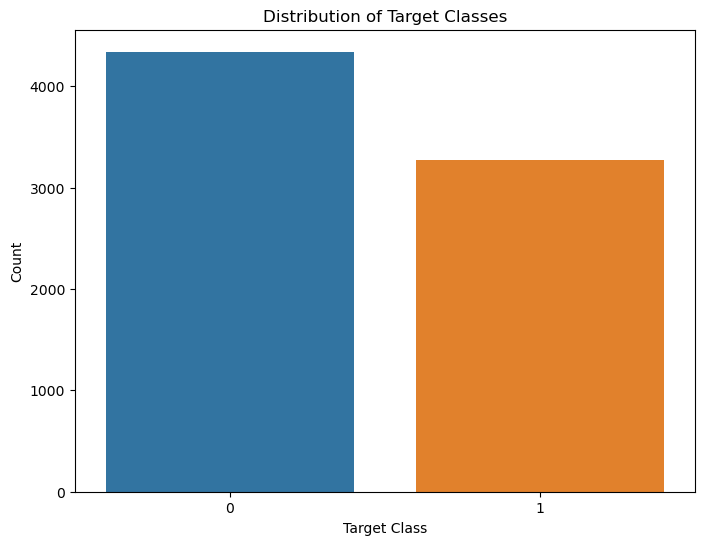

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

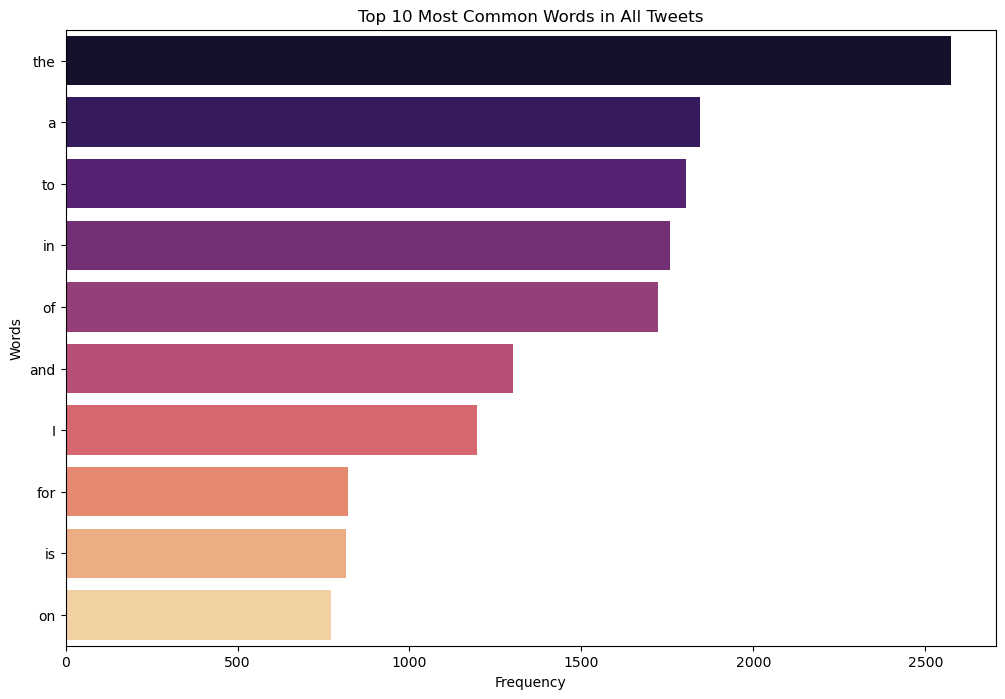

In [84]:
from collections import Counter

# Flatten list of all words in all tweets and count occurrences
words = ' '.join(df['text']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)

# Data for plotting
words, counts = zip(*most_common_words)

# Plot settings
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='magma')
plt.title('Top 10 Most Common Words in All Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [13]:
import re
from langdetect import detect
from datetime import datetime


In [80]:

# Example: Perform Language Detection
df['language'] = df['text'].apply(lambda x: detect(x))

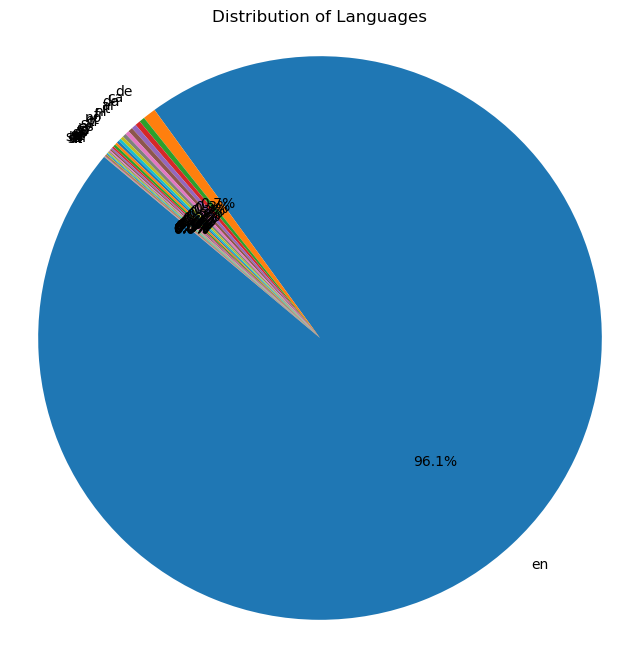

In [82]:
language_counts = df['language'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Languages')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [56]:
#Calculate Tweet Length (number of characters)
df['tweet_length_chars'] = df['text'].apply(len)
df

,id,keyword,location,text,target,tweet_length_chars
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'location' column
df['location'] = label_encoder.fit_transform(df['location'].astype(str))


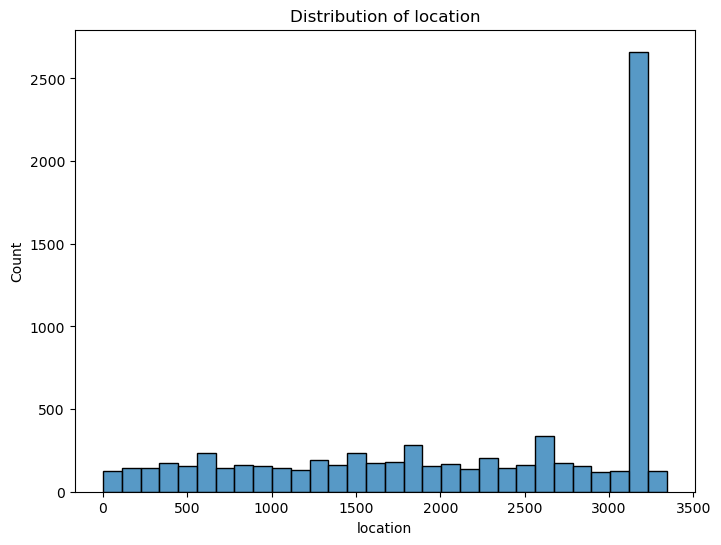

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='location', bins=30)
plt.title('Distribution of location')
plt.xlabel('location')
plt.ylabel('Count')
plt.show()


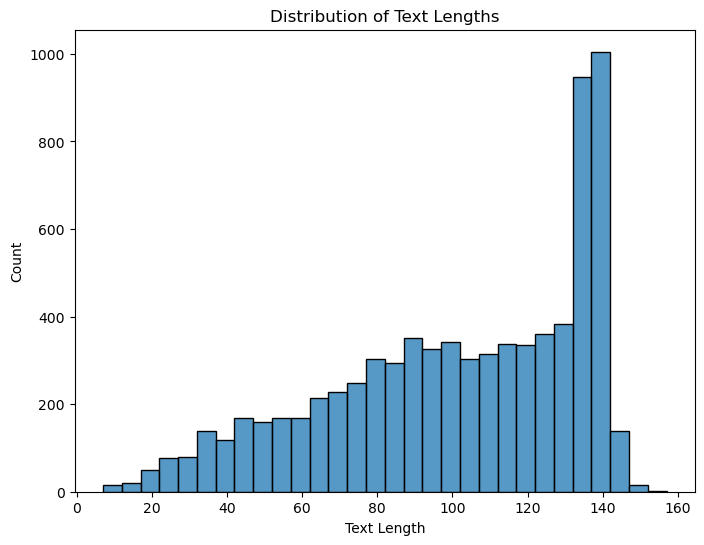

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tweet_length_chars', bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

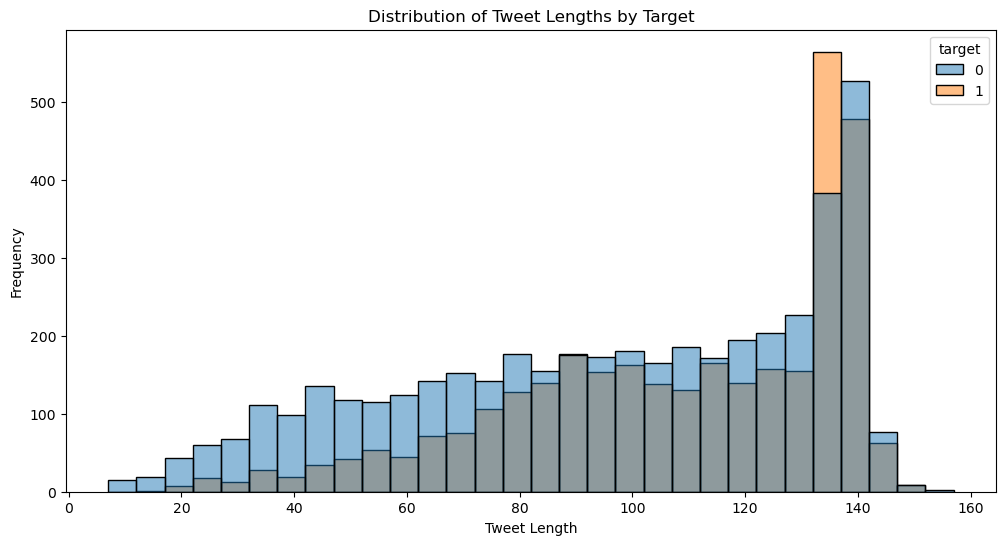

In [58]:
# Plot settings
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tweet_length_chars', hue='target', bins=30)
plt.title('Distribution of Tweet Lengths by Target')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


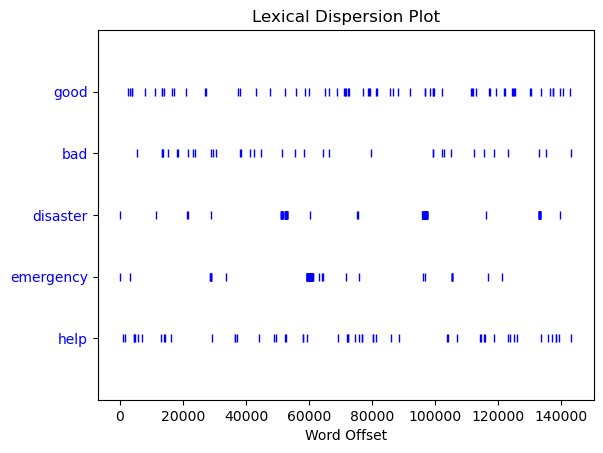

In [24]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Concatenate all text data into a single string for analysis
text = ' '.join(df['text'].dropna().values)

# Tokenize the text
tokens = word_tokenize(text)

# Words to plot
words_to_plot = ['good', 'bad', 'disaster', 'emergency', 'help']

# Create the dispersion plot
nltk.download('punkt')

text = nltk.Text(tokens)
text.dispersion_plot(words_to_plot)

In [ ]:
words = ' '.join(df['text']).split()
word_counts = Counter(words)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='tweet_length_chars', y='word_count', hue='target', style='target', palette='Set1', s=50)
plt.title('Tweet Length vs. Word Count')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Word Count (words)')
plt.show()

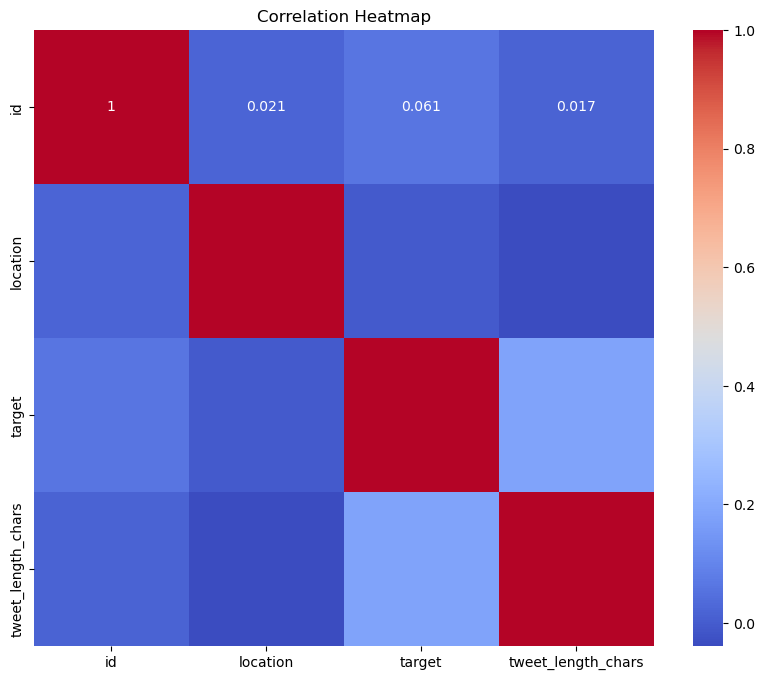

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
from nltk import FreqDist
# Initialize FreqDist
fdist = FreqDist(tokens)
fdist

FreqDist({':': 6706, 'http': 4307, '#': 3403, '?': 3126, '.': 2950, '@': 2759, 'the': 2592, 'a': 1874, 'to': 1815, 'in': 1777, ...})

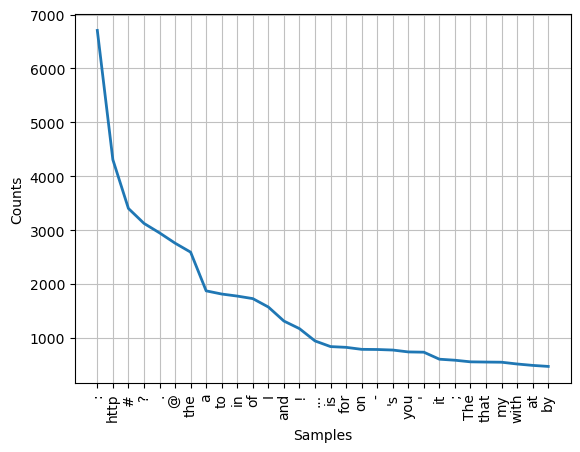

In [28]:
# Plot the frequency distribution
fdist.plot(30, cumulative=False)
plt.show()

In [29]:
X = df['text'].values
y = df['target'].values

In [30]:
import nltk

# Ensure all elements in X are strings
x = [text.decode('utf-8') if isinstance(text, bytes) else text for text in df['text'].values]

def preparing(text):
    sentences = nltk.sent_tokenize(text)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences
    
# Apply the preparing function to each element in X
processed_texts = [preparing(text) for text in x]

processed_texts


[[[('Our', 'PRP$'),
   ('Deeds', 'NNS'),
   ('are', 'VBP'),
   ('the', 'DT'),
   ('Reason', 'NNP'),
   ('of', 'IN'),
   ('this', 'DT'),
   ('#', '#'),
   ('earthquake', 'NN'),
   ('May', 'NNP'),
   ('ALLAH', 'NNP'),
   ('Forgive', 'NNP'),
   ('us', 'PRP'),
   ('all', 'DT')]],
 [[('Forest', 'NNP'),
   ('fire', 'NN'),
   ('near', 'IN'),
   ('La', 'NNP'),
   ('Ronge', 'NNP'),
   ('Sask', 'NNP'),
   ('.', '.')],
  [('Canada', 'NNP')]],
 [[('All', 'DT'),
   ('residents', 'NNS'),
   ('asked', 'VBD'),
   ('to', 'TO'),
   ("'shelter", 'VB'),
   ('in', 'IN'),
   ('place', 'NN'),
   ("'", "''"),
   ('are', 'VBP'),
   ('being', 'VBG'),
   ('notified', 'VBN'),
   ('by', 'IN'),
   ('officers', 'NNS'),
   ('.', '.')],
  [('No', 'DT'),
   ('other', 'JJ'),
   ('evacuation', 'NN'),
   ('or', 'CC'),
   ('shelter', 'NN'),
   ('in', 'IN'),
   ('place', 'NN'),
   ('orders', 'NNS'),
   ('are', 'VBP'),
   ('expected', 'VBN')]],
 [[('13,000', 'CD'),
   ('people', 'NNS'),
   ('receive', 'JJ'),
   ('#', '#'),
 

In [31]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [32]:
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X[i])
    review = review.lower()
    review = nltk.word_tokenize(review)
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [33]:
text_data = ' '.join(corpus)
tokens = word_tokenize(text_data)
fdist = FreqDist(tokens)
fdist

FreqDist({'co': 4746, 'http': 4721, 'like': 411, 'fire': 363, 'amp': 344, 'get': 311, 'not': 310, 'bomb': 239, 'new': 228, 'via': 220, ...})

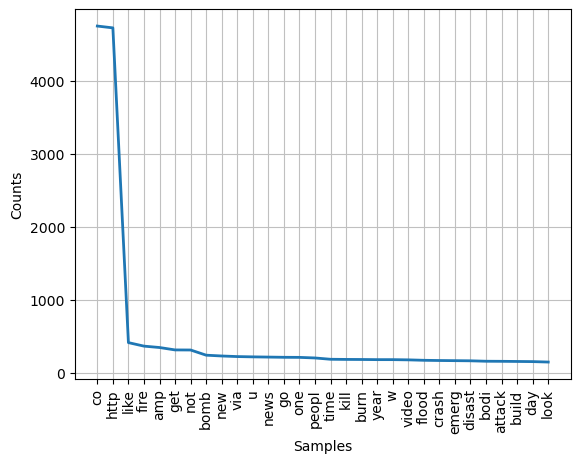

In [34]:

fdist.plot(30, cumulative=False)
plt.show()

In [35]:
# Create an NLTK Text object
text = nltk.Text(tokens)

# Identify and print collocations
text.collocations()

bodi bag; mass murder; suicid bomber; oil spill; atom bomb; burn
build; http http; train derail; northern california; prebreak best;
cross bodi; youtub video; fedex longer; look like; rescuer search;
wreckag conclus; costlier bigger; heat wave; raze northern; sue
legionnair


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
print(len(cv.get_feature_names_out()))
pd.DataFrame(X,columns=cv.get_feature_names_out())

18868


,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aac,aag,aal,aamir,aan,...,zzcupnz,zzk,zznbvfuvo,zzpojgngaj,zzr,zzsee,zztbvjypn,zzuz,zzweeezjug,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv2=TfidfVectorizer()
X = cv2.fit_transform(corpus).toarray()
print(len(cv.get_feature_names_out()))
pd.DataFrame(X,columns=cv.get_feature_names_out())

18868


,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aac,aag,aal,aamir,aan,...,zzcupnz,zzk,zznbvfuvo,zzpojgngaj,zzr,zzsee,zztbvjypn,zzuz,zzweeezjug,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                       random_state = 0)

In [40]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [41]:
predictions = classifier_rf.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1222  108]
 [ 397  557]]


              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1330
           1       0.84      0.58      0.69       954

    accuracy                           0.78      2284
   macro avg       0.80      0.75      0.76      2284
weighted avg       0.79      0.78      0.77      2284



f1-score is 78% with cv,cv2
            77% when i add location to data X

In [43]:
from sklearn.linear_model import LogisticRegression
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[1211  119]
 [ 335  619]]


              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1330
           1       0.84      0.65      0.73       954

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284



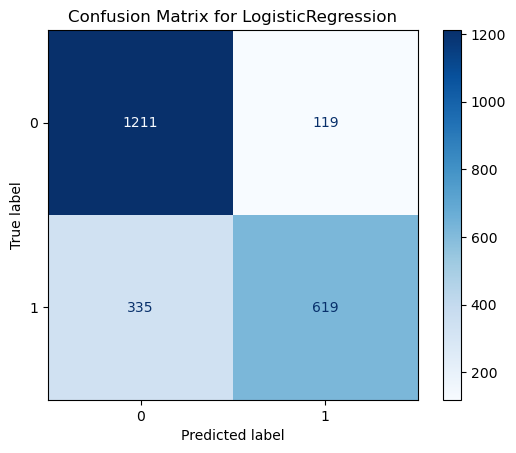

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for LogisticRegression')
plt.show()
    